### Fill in group number and member names:

In [12]:
GROUP = "3"
NAME1 = "Nils Romanus Myrberg"
NAME2 = "Måns Karp"

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
# Optimization for learning - FRTN50

## Assignment 1

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel-dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that 

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that 

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as 

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x) 
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let 
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the step-length/residual, $\norm{x^{k+1} - x^k}_{2}$, of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the \eqref{eq:pg} will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex. 
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment. 
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

In [13]:
#Fixes Equation Numbering
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

UsageError: Line magic function `%%javascript` not found.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

---
### Task 1:

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__ 

The Hessian of $f$ is well defined and $\nabla ^{2} f(x) = Q$. Since $Q\in\mathbb{S}_{++}^{n}$, convexity of $f$ follows from the second order condition for convexity.

Since $\iota_S$ is a constant function (hence convex) on its effective domain we need only show that $S$ is a convex set to show that $\iota_S$ is a convex function. This is shown in expression \ref{m1}, where $x,y \in S$ and $\theta \in [0,1]$.

\begin{equation}
    a \leq \theta x + (1 - \theta)y \leq \theta b + (1 - \theta)b \leq b
    \implies \theta x + (1 - \theta)y \in S
    \label{m1}
\end{equation}

Constraint qualification holds since

\begin{equation}
    relint (dom \iota_S) = relint S \neq \emptyset
\end{equation}
\begin{equation}
    relint (dom f) = \mathbb{R} ^{n}
\end{equation}
\begin{equation}
    \implies relint (dom \iota_S) \cap relint (dom f) \neq \emptyset.
\end{equation}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__ 

$f^\ast$, The Fenchel conjugate of $f$ is computed by using the Fenchel-Young equality displayed in equation \ref{e1}.

\begin{equation}
    f(x^\ast) = s^T x^\ast - f^\ast(s) \quad iff \quad s \in \partial f(x^\ast)
    \label{e1}
\end{equation}

Where $\partial f(x^\ast)$ denotes the subdifferential of $f$ at $x^\ast$. Since $f$ is differentiable on $\mathbb{R}^n$ its subdifferential is the singleton set displayed in expression \ref{e2}.

\begin{equation}
    \partial f(x) = \{ \nabla f(x) \} =\{Qx + q \}  \quad \forall \quad x \in  \mathbb{R}^n
    \label{e2}
\end{equation}

Using the singleton set in expression \ref{e2} in the condition for the Fenchel-Young equality one arrives at expression \ref{e3}.

\begin{equation}
    s = Qx^\ast + q \Leftrightarrow x^\ast = Q^{-1}(s - q)
    \label{e3}
\end{equation}

Where $Q^{-1}$ is well-defined since $Q\in\mathbb{S}_{++}^{n}$. Using expression \ref{e3} in the Fenchel-Young equality \ref{e1} one arrives at expression \ref{e4}

\begin{equation}
    f^\ast(s) = (s^T x^\ast - f(x^\ast) = \frac{1}{2} (Q^{-1}(s-q))^T Q(Q^{-1}(s-q)) - q^T(Q^{-1}(s-q))) = \frac{1}{2} (s-q)^T Q^{-1} (s-q)
    \label{e4}
\end{equation}

$\iota_S^{\ast}$, The Fenchel conjugate of $\iota_S$ is computed by using the conjugate definition. One may note that $\iota_S$ is a separable function that can be written on the form displayed in expression \ref{e5}

\begin{equation}
    \iota_S(x) = \sum^n_{i=1} \iota_{[a_i, b_i]}(x_i)
    \label{e5}
\end{equation}

where $a_i$, $b_i$ and $x_i$ denotes component with index $i \in \{1,2....,n\}$ of each vector $a$, $b$, $x$ respectively. Using the definition of the conjugate one may compute the conjugate of the scalar component $\iota_{[a_i, b_i]}(x_i)$ of $\iota_S(x)$ with index $i \in \{1,2....,n\}$ as shown in expression \ref{e6}. 

\begin{equation}
    \iota_{[a_i, b_i]}^{\ast}(s_i) = \sup_{x \in \mathbb{R}} (s_i^Tx_i - \iota_{[a_i, b_i]}(x_i)) = \sup_{x \in [a_i, b_i]} (s_i^Tx_i) = \begin{cases}
        s_i^Ta_i \quad s_i < 0 \\  0 \quad s_i = 0 \\ s_i^Tb_i \quad s_i > 0
    \end{cases}
    \label{e6}
\end{equation}

Since $\iota_S(x)$ is a separable, proper, closed and convex function its Fenchel conjugate is also separable, resulting in expression \ref{e7}.

\begin{equation}
    \iota^{\ast}_S(s) = \sum^n_{i=1} \iota_{[a_i, b_i]}^{\ast}(s_i) \Leftrightarrow \begin{cases}
    v_i = \begin{cases}
    s_i^Ta_i \quad s_i < 0 \\  0 \quad s_i = 0 \\ s_i^Tb_i \quad s_i > 0 \\
    \end{cases} \\
        \iota^{\ast}_S(s) = \sum^n_{i=1} v_i
    \end{cases}
    \label{e7}
\end{equation}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 3:

Write down a Fenchel-dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

A Fenchel dual problem is given by

\begin{equation}
\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}} f^{\ast}(-\mu) + \iota_{S}^{\ast}(\mu).
\end{equation}
This is dervied by the following procedure. Let $x^{\ast}$ solve the following problem 

\begin{equation}
\underset{x \in \mathbb{R}^{n}}{\text{minimize}} f(x) + \iota_{S}(x).
\end{equation}

Since $f$ and $\iota_{S}$ are closed convex functions and constraint qualification holds, this is equivalent to

\begin{equation}
    0 \in \partial f(x^\ast) + \partial \iota_{S}(x^\ast)
\end{equation}

Now let $\mu^{\ast} \in \partial \iota_{S}(x^\ast)$, then the above is in turn equivalent to

\begin{equation}
    \begin{cases}
        \mu^{\ast} \in \partial \iota_{S}(x^\ast)\\
        -\mu^{\ast} \in \partial f(x^\ast).
    \end{cases}
\end{equation}

Since $f$ and $\iota_{S}$ are closed convex functions, this is equivalent to

\begin{equation}
    \begin{cases}
        x^{\ast} \in \partial \iota_{S}^{\ast}(\mu^\ast)\\
        x^{\ast} \in \partial f^{\ast}(-\mu^\ast).
    \end{cases}
\end{equation}

Which in turn is equivalent to

\begin{equation}
    0 \in \partial \iota_{S}^{\ast}(\mu^\ast) - \partial f^{\ast}(-\mu^\ast).
\end{equation}

This is equivalent to that $\mu^{\ast}$ solves the following problem 

\begin{equation}
\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}} f^{\ast}(-\mu) + \iota_{S}^{\ast}(\mu).
\end{equation}

Constraint qualification holds for this problem since

\begin{equation}
    \relint (\dom \iota_{S}^{\ast}) = \relint (\dom f^{\ast}) = \mathbb{R}^{n}
\end{equation}
\begin{equation}
    \implies \relint (\dom \iota_S^{\ast}) \cap \relint (\dom f^{\ast}) \neq \emptyset.
\end{equation}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$.

_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__ 

A function $f$ is $\beta$-smooth if its gradient is $\beta$-Lipschitz continous, i.e if its gradient fulfills the condition displayed in equation \ref{e8}.

\begin{equation}
    \norm{\nabla f(x) - \nabla f(y)}_2 \leq \beta \norm{x-y}_2 \quad \forall \quad x,y \in \mathbb{R}^n
    \label{e8}
\end{equation}

Using the definition coupled with the definition of an operator norm, and letting $f$ be the aforementioned quadratic function, one arrives at expression \ref{e9}.

\begin{equation}
    \norm{\nabla f(x) - \nabla f(y)}_2 = \norm{Qx - q - (Qy - q)}_2 = \norm{Q(x - y)}_2 \leq \norm{Q}_2 \norm{x-y}_2 = \lambda_{\max}(Q)\norm{x-y}_2
    \label{e9}
\end{equation}

Where $\norm{Q}_2$ denotes the spectral norm of $Q$ which is its largest eigenvalue denoted $\lambda_{\max}(Q)$. Comparing expression \ref{e9} with the definition in equation \ref{e8} one may identify $\beta = \norm{Q}_2$. Performing the same operation for the the Fenchel-conjugate of $f$ one arrives at expression \ref{e10}.

\begin{equation}
    \norm{\nabla f^{\ast}(x) - \nabla f^{\ast}(y)}_2 = \norm{Q^{-1}(x - q) - Q^{-1}(y - q)}_2 = \norm{Q^{-1}(x - y)}_2 \leq \norm{Q^{-1}}_2 \norm{x-y}_2 = \lambda_{\max}(Q^{-1})\norm{x-y}_2
    \label{e10}
\end{equation}

Once again comparing expression \ref{e10} witht the defintion in equation \ref{e8} one may identify $\beta^{\ast} = \norm{Q^{-1}}_2$ which is, once again, well-defined since $Q\in\mathbb{S}_{++}^{n}$.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__ 

As shown in task 2 $\nabla f(x) = Qx + q$. $\nabla f^{\ast}(s) : \mathbb{R}^{n} \mapsto \mathbb{R} $ is computed by the steps listed in expression \ref{e23}

\begin{equation}
    \nabla f^{\ast}(s) = \nabla (\frac{1}{2} (s-q)^TQ^{-1}(s-q)) = Q^{-1}(s-q)
    \label{e23}
\end{equation}

$\prox_{\gamma \iota_{S}}$ is computed by noting that the $\iota_{S}$ is seperable and using the fact that expression \ref{e24} holds for the separable $\iota_{S}$.

\begin{equation}
    \iota_S(x) = \sum^n_{i=1} \iota_{[a_i, b_i]}(x_i) \Leftrightarrow \prox_{\gamma \iota_{S}}(z) = \begin{bmatrix}
\prox_{ \gamma \iota_{[a_1, b_1]}}(z_1) \\
\vdots \\
\prox_{ \gamma \iota_{[a_n, b_n]}}(z_n)
\end{bmatrix} 
\label{e24}
\end{equation}

The proximal operator can subsequently be computed by considering the scalar case for an arbitrary index $i \in \{1,...,n\}$ and using the definition of the proximal operator as shown in expression \ref{e25}.

\begin{equation}
    \prox_{\gamma \iota_{[a_i, b_i]}}(z_i) = \operatorname*{argmin}_{x \in \mathbb{R}} (\iota_{[a_i, b_i]}(z_i) + \frac{1}{2\gamma} \norm{x-z}_2^2) = \operatorname*{argmin}_{x \in [a_i,b_i]} (\frac{1}{2\gamma} \norm{x-z}_2^2) = \Pi(z_i)_{[a_i,b_i]} = \begin{cases}
        a_i \quad z_i \leq a_i \\
        z_i \quad z_i \in (a_i, b_i) \\
        b_i \quad z_i \geq b_i
    \end{cases}
    \label{e25}
\end{equation}

Which can be rewritten, using a more compact representation, as expression \ref{e26}.

\begin{equation}
\begin{cases}
    v_i = \begin{cases}
        a_i \quad v_i \leq a_i \\
        v_i \quad v_i \in (a_i, b_i) \\
        b_i \quad v_i \geq b_i
\end{cases} \\
    \prox_{\gamma \iota_{S}}(z) = \begin{bmatrix}
v_1 \\
\vdots \\
v_n
\end{bmatrix} 
\end{cases}
\label{e26}
\end{equation}

Since $\iota_{S}$ is convex one may use Moreau decomposition to compute the proximal operator of its Fenchel conjugate as shwon in expression \ref{e27}.

\begin{equation}
    \prox_{\gamma \iota_{S}^{\ast}}(z) = z - \gamma \prox_{\gamma^{-1} \iota_{S}}(\gamma^{-1} z) \Leftrightarrow 
    \begin{cases}
    \nu_i = \begin{cases}
        \nu_i - \gamma a_i \quad \nu_i \leq a_i\gamma \\
        0 \quad \nu_i \in (a_i\gamma, b_i\gamma) \\
        \nu_i - \gamma b_i \quad \nu_i \geq b_i\gamma
\end{cases} \\
    \prox_{\gamma \iota_{S}^{\ast}}(z) = \begin{bmatrix}
\nu_1 \\
\vdots \\
\nu_n
\end{bmatrix} 
\end{cases}
    \label{e27}
\end{equation}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\minimize}{minimize}$
---
### Task 6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

_Attention/hint:_ Keep track for your minus signs.

__Solution:__ 

Consider the composite optimization problem displayed in expression \ref{e11}.

\begin{equation}
    \minimize_{x \in \mathbb{R}^n} f(x) + g(x)) 
    \label{e11}
\end{equation}

If one assumes $f$ to be $\beta$-smooth and $g$ closed convex one may replace $f$ with its coinciding quadratic upper bound and minimize in every iteration in order to arrive at the proximal gradient update scheme displayed in \ref{e12}.

\begin{equation}
    x^{k+1} = \prox_{\gamma, g}(x^{k} - (\gamma^{k})^{-1} \nabla f(x^k))
    \label{e12}
\end{equation}

Where $x^k$ denotes $x$ at iteration $k$. As shown in tasks 4 and 1, the quadratic function $ f(x) = \frac{1}{2}x^TQx + q^Tx$ is $\beta$-smooth, and $g(x) = \iota_S(x)$ closed convex. The proximal gradient update shceme for the primal problem displayed in \ref{e12} hence becomes expression \ref{e13}.

\begin{equation}
    x^{k+1} = \prox_{\gamma, \iota_S}(x^k - (\gamma^{k})^{-1} (Qx^k + q))
    \label{e13}
\end{equation}

Using the result from task 5 one may explicitly write the primal proximal update scheme as expression \ref{e14}

\begin{equation}
x^{k+1} = \prox_{\gamma, \iota_S}(x^k - (\gamma^{k})^{-1} (Qx^k + q)) = \begin{bmatrix}
e_1^k \\
\vdots \\
e_n^k
\end{bmatrix} \quad \quad
    e_i^k = \begin{cases}
        a_i \quad if \quad  x_i^k + (\gamma^{k})^{-1}( \sum^n_{j=1}Q_{ij}x_i^k + q_i ) < a_i \\
        x_i^k + (\gamma^{k})^{-1} (\sum^n_{j=1}Q_{ij}x_i^k + q_i)  \quad if \quad  x_i^k + (\gamma^{k})^{-1} (\sum^n_{j=1}Q_{ij}x_i^k + q_i) \in [a_i, b_i]\\
        b_i \quad if \quad  x_i^k + (\gamma^{k})^{-1} (\sum^n_{j=1}Q_{ij}x_i^k + q_i ) > b_i
    \end{cases}
    \label{e14}
\end{equation}

Where $(\cdot)^k_i$ denotes component with index $i$ of a vector at iteration $k$. Note that expression \ref{e14} can be written in the more compact way displayed in expression \ref{e16}.

\begin{equation}
    \begin{cases}
        v^k = x^k - (\gamma^{k})^{-1} (Qx^k + q) \\
        x^{k+1}_i = \begin{cases}
            a_i \quad v^k_i \leq a_i\\ 
            v^k_i \quad v^k_i \in (a_i,b_i) \\
            b_i \quad v^k_i \geq b_i
        \end{cases} 
    \end{cases}
    \label{e16}
\end{equation}

Consider the dual problem derived in task 5 displayed in equation \ref{e15}.

\begin{equation}
    \underset{\mu \in \mathbb{R}^{n}}{\text{minimize}} f^{\ast}(-\mu) + \iota_{S}^{\ast}(\mu)
    \label{e15}
\end{equation}

In the dual problem case $f^{\ast}$ is $\beta$-smooth, due to strong convexity of $f$, and $\iota_{S}^{\ast}$ closed convex yielding a proximal update scheme displayed in equation \ref{e17}.

\begin{equation}
    \mu^{k+1} = \prox_{\gamma_k, \iota_{S}^{\ast}}(\mu^{k} + (\gamma^{k})^{-1} \nabla f^{\ast}(-\mu^k)) = \prox_{\gamma_k, \iota_{S}^{\ast}}(\mu^{k} + (\gamma^{k})^{-1} (Q^{-1}(-\mu^k -q))
    \label{e17}
\end{equation}

Since $\prox_{\gamma_k, \iota_{S}^{\ast}}$ is known from task 5 the proximal update update scheme for the dual problem can be explicetely written as expression \ref{e18} using the compact representation.

\begin{equation}
    \begin{cases}
        \nu^k = \mu^{k} + (\gamma^{k})^{-1} (Q^{-1}(-\mu^k -q)) \\
        \mu^{k+1}_i = \begin{cases}
            \nu_i^k - \gamma^ka_i \quad \nu_i^k \leq a_i\gamma^k\\ 
            0 \quad \nu_i^k \in (\gamma^ka_i,\gamma^kb_i) \\
            \nu_i^k - \gamma^kb_i \quad \nu_i^k \geq b_i\gamma^k
        \end{cases} 
    \end{cases}
    \label{e18}
\end{equation}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and starting from the optimality condition for the dual problem (given by Fermat's rule), recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2).

__Solution:__ 

Given $\mu^{\ast} \in \mathbb{R} ^{n}$ is an optimal solution to the dual problem, expression \ref{e19} holds by Fermat's rule.

\begin{equation}
    0 \in \partial(\iota_{S}^{\ast}(\mu^{\ast}) + f^{\ast}(-\mu^{\ast})) = \partial \iota_{S}^{\ast}(\mu^{\ast}) - \partial f^{\ast}(-\mu^{\ast})
    \label{e19}
\end{equation}

Where the subdifferential of the sum is the sum of subdifferentials due to convexity of $\iota_{S}^{\ast}$ and $\partial f^{\ast}$. By letting $x^{\ast} \in \partial f^{\ast}(-\mu^{\ast})$ equation \ref{e19} is equivalent to expression \ref{e20}.

\begin{equation}
    \begin{cases}
        x^{\ast} \in \partial f^{\ast}(-\mu^{\ast})  \\
        x^{\ast} \in \partial \iota_{S}^{\ast}(\mu^{\ast})
    \end{cases}
    \label{e20}
\end{equation}

Since $f^{\ast}$ is differentiable for all $\mu \in \mathbb{R}$ its subdifferential is the singleton set $\partial f^{\ast}(-\mu^{\ast}) = \{ \nabla f^{\ast}(-\mu^{\ast})\}$. Therefore equation \ref{e20} becomes expression \ref{e21}.

\begin{equation}
    \begin{cases}
        x^{\ast} \in \partial f^{\ast}(-\mu^{\ast}) = \{ \nabla f^{\ast}(-\mu^{\ast})\} \\
        x^{\ast} \in \partial \iota_{S}^{\ast}(\mu^{\ast})
    \end{cases} \Leftrightarrow x^{\ast} = \nabla f^{\ast}(-\mu^{\ast}) \Leftrightarrow x^{\ast} = Q^{-1}(-\mu^{\ast} - q)
    \label{e21}
\end{equation}

i.e the first row of equation \ref{e20} uniquely characterizes $x^\ast$ resulting in the optimality condition, for the primal problem, beeing fulfilled as displayed in expression \ref{e22}.

\begin{equation}
    0 \in \partial(f(x^{\ast}) + \iota_{s}(x^{\ast})) = \nabla f(x^{\ast}) + \partial \iota_{s}(x^{\ast}) = Q (Q^{-1}(\mu^{\ast} - q)) + q = 0 
    \label{e22}
\end{equation}
which is equivalent to $x^{\ast} = \nabla f^{\ast}(-\mu^{\ast}) = Q^{-1}(-\mu^{\ast} - q)$ minimizes the primal problem.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
--- 
### Task 8:

Use your results above to fill in the functions below.

__Solution:__ 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    
    return x.T @ Q @ x + q.T @ x 

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the 
    quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    return 1/2 @ (mu - q).T @ np.linalg.inv(Q) @ (mu - q) 

def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box contraint
    [a,b]
    
    :param x: the variable of the indicator function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else: 
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function 
    of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: conjugate of the indicator function of the box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    return sum(np.array([m * a if m <= 0 else 0  if m == 0 else m * b for m in mu]))

def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    # Write your solution here
    return Q @ x + q

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the 
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    return np.linalg.inv(Q) @ (mu - q) 

def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function 
    of the box contraint [a,b], evaluated at x
    
    :param x: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the 
    box contraint [a,b], evaluated at x
    """
    # Write your solution here
    return np.array([a_ if x_ <= a_
                     else x_ if (x_ >= a_ and x_ <= b_)
                     else b_ for x_,a_,b_ in zip(x,a,b)])

def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of 
    the indicator function of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the 
    box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    return np.array([mu_ - gamma * a_ if mu_ <= gamma * a_
                     else 0 if (mu_ >= a_ * gamma and mu_ <= b_ * gamma)
                     else mu_ - gamma * b_ for mu_,a_,b_ in zip(mu,a,b)])

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem 
    given a solution mu* to the dual problem.
    
    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: the extracted primal variable
    """
    # Write your solution here
    return grad_quadconj(mu,Q,q)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

__a)__ What seems to be the best choice of $\gamma$? 2 over beta since largest good step

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable? YES


Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to? NO

__d)__ Reason about why/why not it affects the final point. _Hint:_ Look at the objective function in (2). if start in box just like optimizing a nice quadratic. First step if starts outside projects us on to box

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$? YES

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not? No, if we start outside the first doesnt. If we start inside yes

__Solution:__ 

_Fill in your solution here!_

In [16]:
def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b

(Q,q,a,b) = problem_data()

# Write your solution here

In [92]:
from matplotlib.pyplot import figure
plt.rcParams['text.usetex'] = True

def get_gammas(Q, start = 1, stop = 2, num = 10):
    beta = np.linalg.norm(Q, ord = 2)
    gammas_labels = [str(i) + r'/ $ \beta $ ' for i in np.linspace(start,stop,num)]
    gammas = [i/beta for i in np.linspace(start,stop,num)]
    return gammas, gammas_labels

def solve_primal(gamma, num_iters = 1e3):
    n = 20
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    x = rs.randn(n)
    fs = []
    xs = []
    diffs = []
    iteration = []
    for i in range(1, int(num_iters)):
        xs.append(x)
        temp = x
        f = quad(x,Q,q)
        x = prox_box(x - gamma * grad_quad(x,Q,q),a,b,gamma)
        fs.append(f)
        diffs.append(np.linalg.norm(x-temp, ord = 2))
    return [diffs, fs, xs]

def get_primal_sol_curves(gammas, num_iters = 1e3):
    return [solve_primal(gamma, num_iters)[0] for gamma in gammas] 

def plot_sol_curves(diffs, gamma_labels = None,  gammas = None):
    fig = figure(figsize=(15, 10), dpi=80)
    if gamma_labels and gammas:
        fig.suptitle(r'Residual Norms using $\gamma \in [$' + gamma_labels[0] + ',' + gamma_labels[-1] + ']', fontsize=25)
    for gamma, gamma_label, diff in tqdm(zip(gammas, gamma_labels, diffs)):
        if gamma_labels is not None and gammas is not None:
            plt.semilogy(diff, label = gamma_label)
        else:
            plt.semilogy(diff)
    plt.legend()
    y_lab = plt.ylabel(r'$log ||x^{k+1} - x^{k}||_2$', fontsize=25)
    x_lab = plt.xlabel(r'$k$', fontsize=25)
    plt.show()
    

10it [00:00, 219.46it/s]


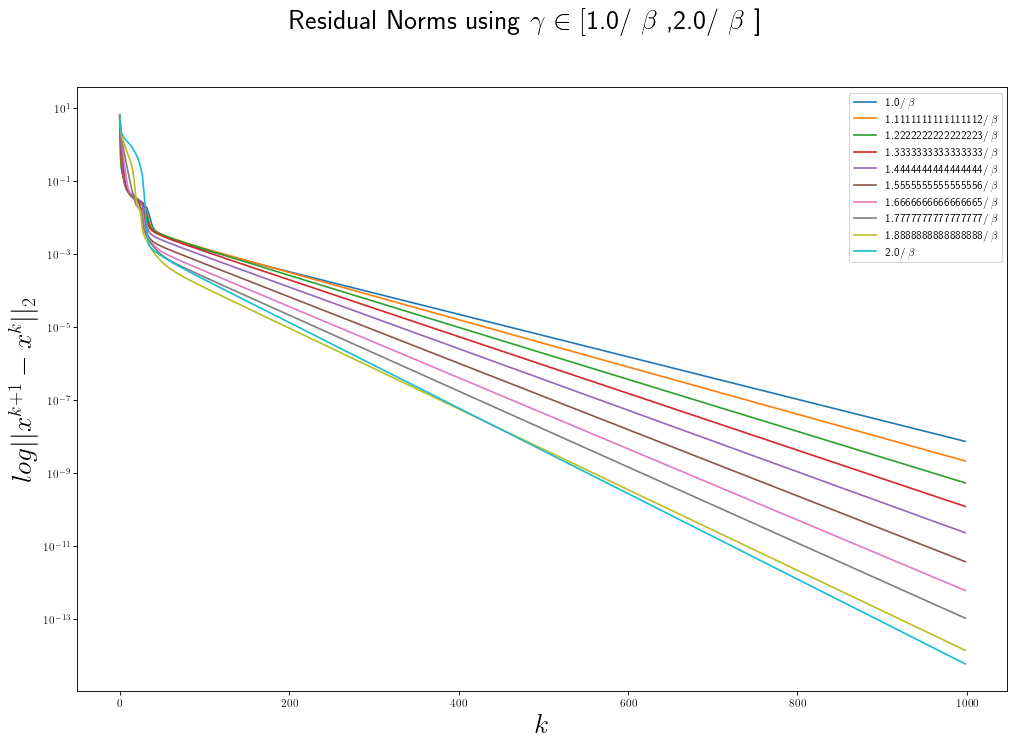

In [93]:
gammas, gamma_labels = get_gammas(Q, start = 1, stop = 2, num = 10)
diffs = get_primal_sol_curves(gammas)
plot_sol_curves(diffs, gamma_labels = gamma_labels,  gammas = gamma_labels)

20it [00:00, 346.48it/s]


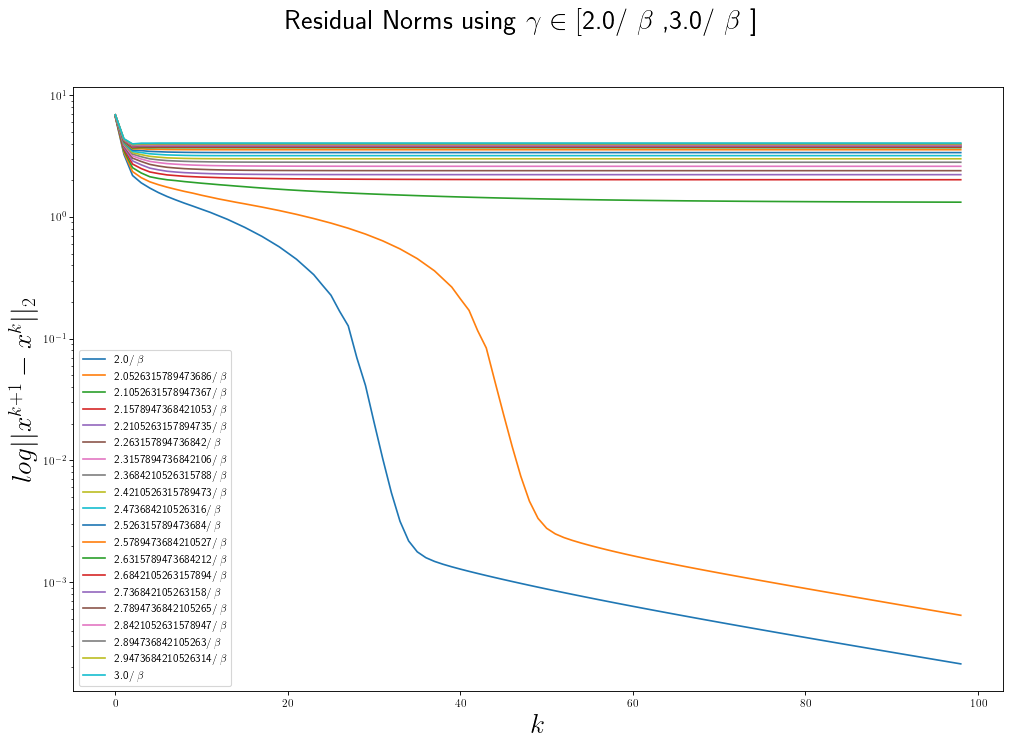

In [108]:
gammas, gamma_labels = get_gammas(Q, start = 2, stop = 3, num = 20)
diffs = get_primal_sol_curves(gammas, num_iters = 1e2)
plot_sol_curves(diffs, gamma_labels = gamma_labels,  gammas = gammas)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 10:

Solve the dual problem. 

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$?

__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

Also: 

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?

__Solution:__ 

_Fill in your solution here!_

In [109]:
def solve_dual(gamma, num_iters = 1e3):
    n = 20
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    x = rs.randn(n)
    fs = []
    xs = []
    diffs = []
    iteration = []
    for i in range(1, int(num_iters)):
        xs.append(x)
        temp = x
        f = quadconj(-x,Q,q)
        x = prox_boxconj(x + gamma * grad_quadconj(-x,Q,q),a,b,gamma)
        fs.append(f)
        diffs.append(np.linalg.norm(x-temp, ord = 2))
    return [diffs, fs, xs]

def get_dual_sol_curves(gammas, num_iters = 1e3):
    return [solve_dual(gamma, num_iters)[0] for gamma in gammas] 

In [110]:
gammas, gamma_labels = get_gammas(np.linalg.inv(Q), start = 2, stop = 3, num = 20)
diffs = get_dual_sol_curves(gammas, num_iters = 1e2)
plot_sol_curves(diffs, gamma_labels = gamma_labels,  gammas = gammas)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [10]:
def test_conjugate(gamma):
    n = 20
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    x = rs.randn(n)
    
    #gamma = 4 / beta
    fs = []
    xs = []
    diffs = []
    iteration = []
    for i in range(1, int(4e3)):
        iteration.append(i)
        xs.append(x)
        temp = x
        f = quad(x,Q,q)
        x = prox_boxconj(x + gamma * grad_quadconj(-x,Q,q) ,a,b,gamma)
        fs.append(f)
        diffs.append(np.linalg.norm(x-temp, ord = 2))
    return diffs, iteration




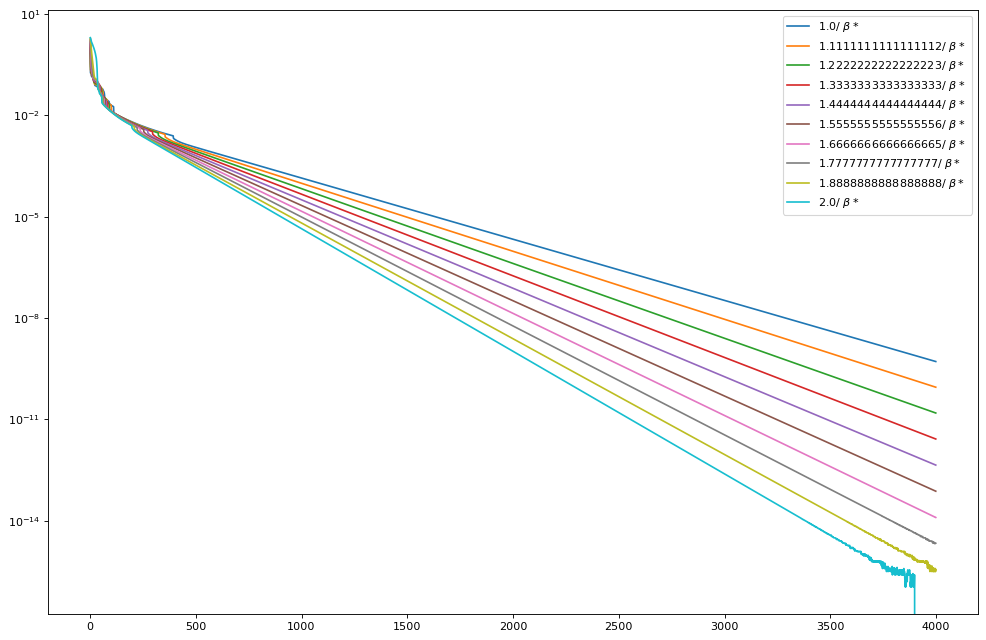

In [11]:
beta = np.linalg.norm(np.linalg.inv(Q), ord = 2)
#beta = np.linalg.norm(Q, ord = 2)
gammas_labels = [str(i) + r'/ $ \beta *$ ' for i in np.linspace(1,2,10)]
gammas = [i/beta for i in np.linspace(1,2,10)]
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
diffs = []
iterations = []
for gamma, gamma_labels in zip(gammas, gammas_labels):
    diffs, iteration = test_conjugate(gamma)
    plt.semilogy(iteration, diffs, label = gamma_labels)
plt.legend()

In [296]:
def test_2(gamma):
    n = 20
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    x = rs.randn(n)
    beta = np.linalg.norm(Q, ord = 2)
    #gamma = 4 / beta
    fs = []
    xs = []
    diffs = []
    iteration = []
    diff = 10000
    while diff > 1e-15:
        iteration.append(i)
        temp = x
        f = quad(x,Q,q)
        x = prox_box(x - gamma * grad_quad(x,Q,q), a,b,gamma)
        diff = np.linalg.norm(x-temp, ord = 2)
        xs.append(x)
        fs.append(f)
        diffs.append(diff)
    return diffs

In [ ]:
plt.rcParams['text.usetex'] = True

from tqdm import tqdm
fig = figure(figsize=(15, 10), dpi=80)
fig.suptitle(r'Residual Norms using $\gamma \in [$' + gammas_labels[0] + ',' + gammas_labels[-1] + ']', fontsize=25)
diffs = []
iterations = []
for gamma, gamma_labels in tqdm(zip(gammas, gammas_labels)):
    diffs = test(gamma)
    plt.semilogy(diffs, label = gamma_labels)
plt.legend()
y_lab = plt.ylabel(r'$log ||x^{k+1} - x^{k}||_2$', fontsize=25)
x_lab = plt.xlabel(r'$k$', fontsize=25)